# Numerical Solutions to the Advection-Diffusion Eqaution in 1-D

A common equation in transport phenomena, either mass or heat. 

## Mathematical Problem  

The advection-diffusion equation in one dimmesion ($x$) is   

\begin{align}
  \frac{\partial u}{\partial t} + a \frac{\partial u}{ \partial x} = \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}

https://nicoguaro.github.io/posts/infinite_fdm/  
https://www.math.utah.edu/~vshankar/5620/IMEX.pdf   
http://runge.math.smu.edu/Math6321/_downloads/imex.pdf  
http://www.math.utah.edu/~vshankar/5620/Ascher1995.pdf  
https://ocw.mit.edu/courses/mathematics/18-086-mathematical-methods-for-engineers-ii-spring-2006/video-lectures/  



## Analytical Solution 
\begin{align}
    U(x,t) = \frac{M}{A\sqrt{4\pi \kappa t}} \exp \left( - \frac{(x-(x_0+at))^2}{4\kappa t} \right)
\end{align}


## Numerical Approaches 

For numerical treatment of the advection-diffusion equation we condsider   

\begin{align}
  u_t = \mathcal{A}(u) + \mathcal{B}(u)
\end{align}

where 

\begin{align}
  \mathcal{A}(u) = a \frac{\partial u}{ \partial x} \;\;\; \text{ and } \;\;\; \mathcal{B}(u) = \kappa \frac{\partial^2 u}{\partial x^2} \;\;.
\end{align}

### Fractional Step Methods

__Goundov Spliting__  
The simple first-order method for solving a the advection-duffison equation 

\begin{align}
\begin{aligned}
U^* &= \mathcal{N}_{\mathcal{A}}(U^n,k), \\
U^{n+1} &= \mathcal{N}_{\mathcal{B}}(U^*,k)
\end{aligned}
\end{align}

where $\mathcal{N}_{\mathcal{A}}(U^n,k)$ solves $u_t = \mathcal{A}(u)$ over a time step $k$ with inital conditions of $U^n$ and $\mathcal{N}_{\mathcal{B}}(U^*,k)$ similarily solves  $u_t = \mathcal{B}(u)$ over a time step $k$ but with inital conditions of $U^*$.  

__Strang Spliting__  
A second-order method is  
\begin{align}
\begin{aligned}
U^* &= \mathcal{N}_{\mathcal{A}}(U^n,k/2), \\
U^{**} &= \mathcal{N}_{\mathcal{B}}(U^*,k), \\
U^{n+1} &= \mathcal{N}_{\mathcal{A}}(U^{**},k/2)
\end{aligned}
\end{align}


In [1]:
# Global
import sys 
import numpy as np 
from scipy import linalg as LA
import matplotlib.pyplot as plt

# Local
sys.path.append('../')
from advdiff.solvers import TDMA
from advdiff.model import AdvDiff
from advdiff.plot import animation


In [2]:
params = {'L':2.*np.pi,'nx':500,'nt':10}
coeffs = {'κ':0.3, 'σ':0.75, 'a':3.}

def initcond(test, M = 1,P = 1,x_0 = np.pi,t=0.1):
    return (M / (P *(4*np.pi*test.κ*t)**0.5)) * np.exp(-(((test.x-(x_0 + test.a*t))**2)/(4*test.κ*t)))

def f(x,t): 
    D = 3e-3
    k = 0.5
    U = 3e-2 
    A = 1. 
    '''Analytical Solution to the Advec. Diff. Eqn.
    '''
    return np.exp(-D*k**2*t)*np.sin(2*np.pi*k*(x-U*t))

test = AdvDiff(params,coeffs)
test.U[0,:] = f(test.x,0)
FTCS  = test.Goundov('FTCS','w')
UpWind  = test.Goundov('UpWind','w')
LaxWendroff = test.Goundov('LaxWendroff','w')
BeamWarming = test.Goundov('BeamWarming','w')

analytical = np.zeros((params['nt'],params['nx']))
for t in range(0,params['nt']):
    analytical[t,:] = f(test.x,t*test.dt)

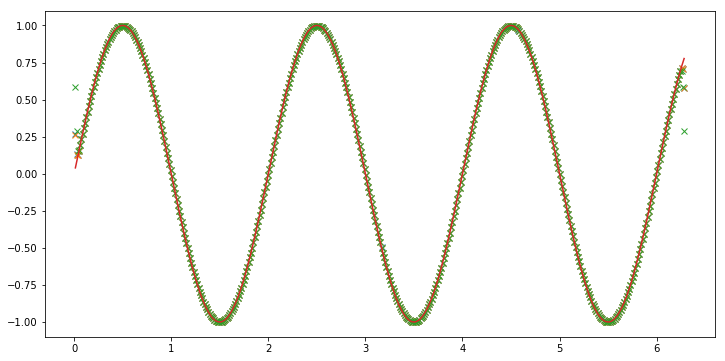

In [3]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(test.x,UpWind[-1,:],'x')
ax.plot(test.x,LaxWendroff[-1,:],'x')
ax.plot(test.x,BeamWarming[-1,:],'x')
ax.plot(test.x,analytical[-1,:])

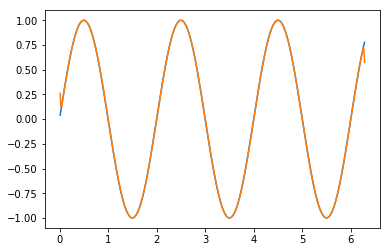

In [4]:
plt.plot(test.x,analytical[9,:])
plt.plot(test.x,LaxWendroff[9,:])


In [ ]:
########################################################
#################   Init. Constant   ###################
########################################################
a  = 3.                    # wave speed 
L  = 2*np.pi               # Domain Length 
nx = 100                    # Num. grid cells
dx = L/(nx-1)              # grid spacing

nt = 100                     # Num time steps
σ  = .5                    # courant number
dt = 0.001                 # time step 

########################################################
##################   Init. Domain   ####################
########################################################
x  = np.linspace(dx,L,nx)  # spatial grid
u  = np.zeros((nt,nx)) # (num methods) X (nx) X (nt)
u[0,:] = f(x,0)   # init. condition

for j in range(0,nt-1):
    for i in (0,nx-1):
        u[j+1,i] = u[j,i] - ((dt*a)/dx)* (u[j,i] - u[j,i-1])  

In [ ]:
plt.plot(x, f(x,1*dt))
plt.plot(x, u[j,:])


In [ ]:
dx